# Task 2 : Extend your framework with audio-based retrieval systems and with evaluation metrics

### Team E

**Don't forget to update the version number after making changes** 

Version 2.0.2
Date: 11/12/2023

## Import Libraries  

In [1]:
import numpy as np
import pandas as pd
import json 

In [3]:
# import utility functions 
from ret import read_data # utility func to load data
from ret import get_id_from_info # utility func to return id by entering song's info
from ret import display_res # utility func to display results 
from ret import get_genre #utility func to get the genres from a list of id´s
from ret import get_genre_from_query #utility func to get the id and genre from the query
from ret import get_genre_from_ids #utility func to get the id and genre from the retrieved results

# import the retrieval systems 
from ret import random_baseline # baseline retrieval system that returns random results 
from ret import text_based # modularized text based retrieval system
from ret import audio_based # modularized audio based retrieval system

# import wrapper function to calculate cosine similarity
from ret import cos_sim 

# import evaluation functions 
from ret import gen_cov_10
from ret import ndcg_score
from ret import gen_div_10
from ret import calculate_precision_at_k
from ret import calculate_recall_at_k
from ret import plot_precision_recall_curve
from ret import get_avg_recall_at_k
from ret import get_avg_precision_at_k

## Load Data

In [45]:
"""
Please put data files in ""./data/" before use 
"""

info = read_data("information")
genres = read_data("genres")

# text embeddings 
tfidf = read_data("lyrics_tf-idf")
word2vec = read_data("lyrics_word2vec")
bert = read_data("lyrics_bert")

# audio embeddings
blf_correlation = read_data("blf_correlation")
ivec256 = read_data("ivec256")
mfcc_stats = read_data("mfcc_stats")
musicnn = read_data("musicnn")

,id,genre
0,01Yfj2T3YTwJ1Yfy,"['rock', 'christian rock']"
1,01gyRHLquwXDlhkO,"['hip hop', 'rap', 'grindcore', 'death metal']"
2,01rMxQv6vhyE1oQX,"['rock', 'pop punk']"
3,02RGE9FNH65RtMS7,"['trance', 'techno', 'progressive trance']"
4,02ZnlCGZEbkfCDxo,"['pop', 'italian pop', 'latin', 'europop', 'am..."
...,...,...
10089,zyzILCQvVeUFIINi,"['rock', 'pop', 'indie rock', 'folk rock', 'ne..."
10090,zzgS4ZqyswamEWNj,"['pop', 'rock', 'teen pop', 'soundtrack', 'sin..."
10091,zzoFYDMlqU1X2zz1,"['jazz', 'jazz fusion']"
10092,zzpkRCGA5ud8q4mv,"['soul', 'blues', 'r b', 'blues rock', 'southe..."


In [5]:
"""
Initialize empty dictionary to store the results

User guide:
the dictionary has three dimensions:
1st dim: query tracks 
available tags ["track1", "track2", "track3"]
2nd dim: retrieval systems 
available tags ["base_line", "tfidf", "word2vec", "bert", "blf_correlation", "ivec256", "mfcc_stats", "musicnn"]
3rd dim: evaluation metrics and retrieved tracks 
available tags ["tracks", "precision@10", "recall@10", "genre_diversity@10", "genre_coverage@10", "ndcg"]

Example:
res["track1"]["base_line"]["tracks"]

"""
with open('result_mod.json', 'r') as f:
    res = json.load(f)

## Track 1 
"Love Me" "The 1975"

In [6]:
name = "Love Me"
artist = "The 1975"
id_track1 = get_id_from_info(name, artist, info)

In [7]:
# retrieve tracks with random baseline 
res["track1"]["base_line"]["tracks"] = random_baseline(id=id_track1, info=info, N=10)

In [8]:
# retrieve tracks with text based retrieval systems 
res["track1"]["tfidf"]["tracks"] = text_based(id=id_track1, repr=tfidf, N=10, sim_func=cos_sim)
res["track1"]["word2vec"]["tracks"] = text_based(id=id_track1, repr=word2vec, N=10, sim_func=cos_sim)
res["track1"]["bert"]["tracks"] = text_based(id=id_track1, repr=bert, N=10, sim_func=cos_sim)

In [15]:
# retrieve tracks with audio based retrieval systems 
res["track1"]["blf_correlation"]["tracks"] = audio_based(id=id_track1, repr=blf_correlation, N=10, sim_func=cos_sim)
res["track1"]["ivec256"]["tracks"] = audio_based(id=id_track1, repr=ivec256, N=10, sim_func=cos_sim)
res["track1"]["mfcc_stats"]["tracks"] = audio_based(id=id_track1, repr=mfcc_stats, N=10, sim_func=cos_sim)
res["track1"]["musicnn"]["tracks"] = audio_based(id=id_track1, repr=musicnn, N=10, sim_func=cos_sim)
res["track1"]["musicnn"]["tracks"]

array(['WBVSbTbBFMhyvNpr', 'k68WuDMJJvrWeeXX', 'YkfxTMmU5Ann2bc7',
       'xSA69YbYLj0ttffz', 'lgOJYkIote9rJHdj', 'hFQXgdL4ve2s1GoM',
       'rcWvIbfLePvNHn08', 'fNsY2OMOedj3xFAg', 'RC6zIVvzi9AO3wfL',
       'PfU6WFH8J7sMBvl8'], dtype=object)

In [16]:
#retrieve genres of the results for precision@10 & recall@10 calculation
q1_genres_mfcc_stats = get_genre_from_ids(res["track1"]["mfcc_stats"]["tracks"],genres)
q1_genres_blf_correlation = get_genre_from_ids(res["track1"]["blf_correlation"]["tracks"], genres)
q1_genres_ivec256 = get_genre_from_ids(res["track1"]["ivec256"]["tracks"], genres)
q1_genres_musicnn = get_genre_from_ids(res["track1"]["musicnn"]["tracks"], genres)
q1_genres_tfidf = get_genre_from_ids(res["track1"]["tfidf"]["tracks"], genres)
q1_genres_word2vec = get_genre_from_ids(res["track1"]["word2vec"]["tracks"],genres)
q1_genres_bert =  get_genre_from_ids(res["track1"]["bert"]["tracks"],genres)
q1_genres_base_line = get_genre_from_ids(res["track1"]["base_line"]["tracks"],genres)
q1_genres_musicnn 

[('WBVSbTbBFMhyvNpr', "['rock', 'pop']"),
 ('k68WuDMJJvrWeeXX', "['pop', 'rock', 'pop rock', 'alternative rock']"),
 ('YkfxTMmU5Ann2bc7', "['funk']"),
 ('xSA69YbYLj0ttffz',
  "['pop', 'rock', 'pop rock', 'dance pop', 'teen pop', 'boy band', 'ballroom', 'discofox', 'soundtrack', 'emo', 'easy listening', 'chill out', 'europop']"),
 ('lgOJYkIote9rJHdj',
  "['industrial rock', 'industrial', 'alternative rock', 'electro industrial', 'rock', 'electronic rock', 'experimental', 'experimental rock', 'trip hop']"),
 ('hFQXgdL4ve2s1GoM',
  "['industrial', 'experimental', 'avant garde', 'noise', 'industrial rock', 'rock', 'cyberpunk', 'dark ambient', 'experimental rock', 'post punk', 'trip hop', 'poetry']"),
 ('rcWvIbfLePvNHn08', "['psychedelic rock']"),
 ('fNsY2OMOedj3xFAg',
  "['classic rock', 'pop', 'rock', 'soft rock', 'pop rock', 'new wave', 'soundtrack', 'easy listening']"),
 ('RC6zIVvzi9AO3wfL',
  "['pop', 'rock', 'new wave', 'soundtrack', 'downtempo', 'soft rock', 'discofox']"),
 ('PfU6WFH

In [17]:
# calculate precision @10 for track1

#get query genre
query_genre1 = get_genre_from_query(id_track1, genres)

#query track 1 precision (k=10) for all 8 Retrieval Systems
res["track1"]["mfcc_stats"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_mfcc_stats,10)
precision = res["track1"]["mfcc_stats"]["precision@10"]
print(f"precision@10: {precision}")

res["track1"]["blf_correlation"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_blf_correlation,10)
precision = res["track1"]["blf_correlation"]["precision@10"]
print(f"precision@10: {precision}")

res["track1"]["ivec256"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_ivec256,10)
precision = res["track1"]["ivec256"]["precision@10"] 
print(f"precision@10: {precision}")

res["track1"]["musicnn"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_musicnn,10)
precision = res["track1"]["musicnn"]["precision@10"]
print(f"precision@10: {precision}")

res["track1"]["tfidf"]["precision@10"]= calculate_precision_at_k(query_genre1,q1_genres_tfidf,10)
precision = res["track1"]["tfidf"]["precision@10"]
print(f"precision@10: {precision}")

res["track1"]["word2vec"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_word2vec,10)
precision = res["track1"]["word2vec"]["precision@10"]
print(f"precision@10: {precision}")

res["track1"]["bert"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_bert,10)
precision = res["track1"]["bert"]["precision@10"] 
print(f"precision@10: {precision}")

res["track1"]["base_line"]["precision@10"] = calculate_precision_at_k(query_genre1,q1_genres_base_line,10)
precision = res["track1"]["base_line"]["precision@10"]
print(f"precision@10: {precision}")

precision@10: 0.9
precision@10: 0.9
precision@10: 0.5
precision@10: 0.9
precision@10: 0.7
precision@10: 0.9
precision@10: 0.9
precision@10: 0.6


In [46]:
#query track 1 recall (k=10) for all 8 Retrieval Systems
#create genres dataset list for later use
genres_list = genres.values.tolist()

res["track1"]["mfcc_stats"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_mfcc_stats,genres_list,10)
recall = res["track1"]["mfcc_stats"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["blf_correlation"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_blf_correlation,genres_list,10)
recall = res["track1"]["blf_correlation"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["ivec256"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_ivec256,genres_list,10)
recall = res["track1"]["ivec256"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["musicnn"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_musicnn,genres_list,10)
recall = res["track1"]["musicnn"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["tfidf"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_tfidf,genres_list,10)
recall = res["track1"]["tfidf"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["word2vec"]["recall@10"]= calculate_recall_at_k(query_genre1, q1_genres_word2vec,genres_list,10)
recall = res["track1"]["word2vec"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["bert"]["recall@10"]= calculate_recall_at_k(query_genre1,  q1_genres_bert,genres_list,10)
recall = res["track1"]["bert"]["recall@10"]
print(f"recall@10: {recall}")

res["track1"]["base_line"]["recall@10"] = calculate_recall_at_k(query_genre1, q1_genres_base_line,genres_list,10)
recall = res["track1"]["base_line"]["recall@10"]
print(f"recall@10: {recall}")

recall@10: 0.0009739807986642549
recall@10: 0.001252261026854042
recall@10: 0.0011131209127591484
recall@10: 0.0011131209127591484
recall@10: 0.0006957005704744677
recall@10: 0.0005565604563795742
recall@10: 0.0011131209127591484
recall@10: 0.0005565604563795742


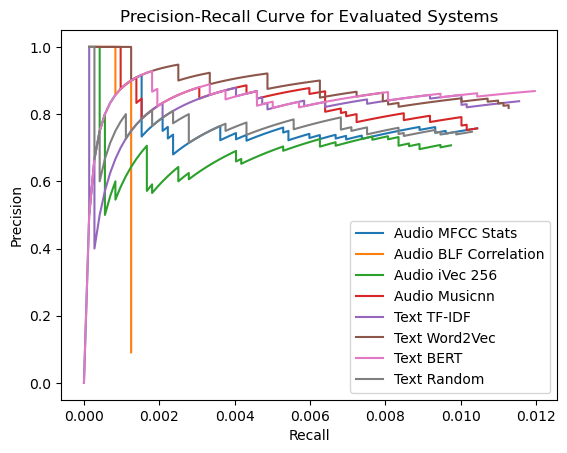

In [45]:
#retrieve 100 results for precision-recall plot (audio based) because k should be varied in the interval [1,100]
q1_100_mfcc_stats = get_genre_from_ids(audio_based(id=id_track1, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q1_100_blf_correlation = get_genre_from_ids(audio_based(id=id_track1, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q1_100_ivec256 = get_genre_from_ids(audio_based(id=id_track1, repr=ivec256, N=100, sim_func=cos_sim), genres)
q1_100_musicnn = get_genre_from_ids(audio_based(id=id_track1, repr=musicnn, N=100, sim_func=cos_sim), genres)
#retrieve 100 text based results for precision recall plot because k should be varied in the interval [1,100]
q1_100_tfidf = get_genre_from_ids(text_based(id=id_track1, repr=tfidf, N=100, sim_func=cos_sim), genres)
q1_100_word2vec = get_genre_from_ids(text_based(id=id_track1, repr=word2vec, N=100, sim_func=cos_sim),genres)
q1_100_bert =  get_genre_from_ids(text_based(id=id_track1, repr=bert, N=100, sim_func=cos_sim),genres)
q1_100_base_line = get_genre_from_ids(random_baseline(id=id_track1, info=info, N=100),genres)


#plot precision recall curve for query track1 for all evaluated systems

system_data1 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre1, "retrieved_genres": q1_100_mfcc_stats, "dataset_genres": genres_list},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre1, "retrieved_genres": q1_100_blf_correlation, "dataset_genres": genres_list},
    "audio ivec_256": {"system_name": "Audio iVec 256","query_genre": query_genre1, "retrieved_genres": q1_100_ivec256, "dataset_genres":genres_list},
    "audio muiscnn": {"system_name": "Audio Musicnn","query_genre": query_genre1, "retrieved_genres": q1_100_musicnn, "dataset_genres":genres_list},
    "text tf-idf": {"system_name": "Text TF-IDF","query_genre": query_genre1, "retrieved_genres": q1_100_tfidf, "dataset_genres":genres_list},
    "text word2vec": {"system_name": "Text Word2Vec","query_genre": query_genre1, "retrieved_genres": q1_100_word2vec, "dataset_genres":genres_list},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre1, "retrieved_genres": q1_genres_bert, "dataset_genres":genres_list},
    "text random": {"system_name": "Text Random Baseline","query_genre": query_genre1, "retrieved_genres": q1_100_base_line, "dataset_genres":genres_list},
}

plot_precision_recall_curve(system_data1)

In [19]:
# calculate genre diversity@10
all_genres = list(set([item for id in genres['id'] for item in get_genre(id, genres)]))

#audio based
q1_genre_mfcc_stats = [get_genre(id, genres) for id in res["track1"]["mfcc_stats"]["tracks"]]
q1_genre_blf_correlation = [get_genre(id, genres) for id in res["track1"]["blf_correlation"]["tracks"]]
q1_genre_ivec256 = [get_genre(id, genres) for id in res["track1"]["ivec256"]["tracks"]]
q1_genre_musicnn = [get_genre(id, genres) for id in res["track1"]["musicnn"]["tracks"]]
#text based
q1_genre_tfidf = [get_genre(id, genres) for id in res["track1"]["tfidf"]["tracks"]]
q1_genre_word2vec = [get_genre(id, genres) for id in res["track1"]["word2vec"]["tracks"]]
q1_genre_bert = [get_genre(id, genres) for id in res["track1"]["bert"]["tracks"]]
q1_genre_base_line = [get_genre(id, genres) for id in res["track1"]["base_line"]["tracks"]]

#calculate genre diversity @10
res["track1"]["mfcc_stats"]["genre_diversity@10"] = gen_div_10(q1_genre_mfcc_stats, all_genres, N=10)
genre_div = res["track1"]["mfcc_stats"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["blf_correlation"]["genre_diversity@10"] = gen_div_10(q1_genre_blf_correlation,all_genres,N=10)
genre_div = res["track1"]["blf_correlation"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["ivec256"]["genre_diversity@10"] = gen_div_10(q1_genre_ivec256,all_genres,N=10)
genre_div = res["track1"]["ivec256"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["musicnn"]["genre_diversity@10"] = gen_div_10(q1_genre_musicnn,all_genres,N=10)
genre_div = res["track1"]["musicnn"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["tfidf"]["genre_diversity@10"] = gen_div_10(q1_genre_tfidf,all_genres,N=10)
genre_div = res["track1"]["tfidf"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["word2vec"]["genre_diversity@10"] = gen_div_10(q1_genre_word2vec,all_genres,N=10)
genre_div = res["track1"]["word2vec"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["bert"]["genre_diversity@10"] = gen_div_10(q1_genre_bert,all_genres,N=10)
genre_div = res["track1"]["bert"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track1"]["base_line"]["genre_diversity@10"] = gen_div_10(q1_genre_base_line,all_genres,N=10)
genre_div = res["track1"]["base_line"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")


genre diversity@10: 4.512733485102955
genre diversity@10: 4.4349930180705925
genre diversity@10: 4.694414369980027
genre diversity@10: 4.327809744157541
genre diversity@10: 4.304279056901011
genre diversity@10: 5.269255144533857
genre diversity@10: 4.98983386417154
genre diversity@10: 5.241668982686684


In [26]:
# calculate genre coverage@10 

res["track1"]["mfcc_stats"]["genre_coverage@10"] = gen_cov_10(res["track1"]["mfcc_stats"]["tracks"], genres)
genre_cov = res["track1"]["mfcc_stats"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["blf_correlation"]["genre_coverage@10"] = gen_cov_10(res["track1"]["blf_correlation"]["tracks"], genres)
genre_cov = res["track1"]["blf_correlation"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["ivec256"]["genre_coverage@10"] = gen_cov_10(res["track1"]["ivec256"]["tracks"], genres)
genre_cov = res["track1"]["ivec256"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["musicnn"]["genre_coverage@10"] = gen_cov_10(res["track1"]["musicnn"]["tracks"], genres)
genre_cov = res["track1"]["musicnn"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["tfidf"]["genre_coverage@10"] = gen_cov_10(res["track1"]["tfidf"]["tracks"], genres)
genre_cov = res["track1"]["tfidf"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["word2vec"]["genre_coverage@10"] = gen_cov_10(res["track1"]["word2vec"]["tracks"], genres)
genre_cov = res["track1"]["word2vec"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["bert"]["genre_coverage@10"] = gen_cov_10(res["track1"]["bert"]["tracks"], genres)
genre_cov = res["track1"]["bert"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track1"]["base_line"]["genre_coverage@10"] = gen_cov_10(res["track1"]["base_line"]["tracks"], genres)
genre_cov = res["track1"]["base_line"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

genre coverage@10: 0.02877697841726619
genre coverage@10: 0.02877697841726619
genre coverage@10: 0.039568345323741004
genre coverage@10: 0.030575539568345324
genre coverage@10: 0.02877697841726619
genre coverage@10: 0.05485611510791367
genre coverage@10: 0.06205035971223022
genre coverage@10: 0.04316546762589928


In [29]:
# calculate ndcg@10 

res["track1"]["mfcc_stats"]["ndcg"] = ndcg_score(id_track1, res["track1"]["mfcc_stats"]["tracks"], genres)
ndcg = res["track1"]["mfcc_stats"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["blf_correlation"]["ndcg"] = ndcg_score(id_track1, res["track1"]["blf_correlation"]["tracks"], genres)
ndcg = res["track1"]["blf_correlation"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["ivec256"]["ndcg"] = ndcg_score(id_track1, res["track1"]["ivec256"]["tracks"], genres)
ndcg = res["track1"]["ivec256"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["musicnn"]["ndcg"] = ndcg_score(id_track1, res["track1"]["musicnn"]["tracks"], genres)
ndcg = res["track1"]["musicnn"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["tfidf"]["ndcg"] = ndcg_score(id_track1, res["track1"]["tfidf"]["tracks"], genres)
ndcg = res["track1"]["tfidf"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["word2vec"]["ndcg"] = ndcg_score(id_track1, res["track1"]["word2vec"]["tracks"], genres)
ndcg = res["track1"]["word2vec"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["bert"]["ndcg"] = ndcg_score(id_track1, res["track1"]["bert"]["tracks"], genres)
ndcg = res["track1"]["bert"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track1"]["base_line"]["ndcg"] = ndcg_score(id_track1, res["track1"]["base_line"]["tracks"], genres)
ndcg = res["track1"]["base_line"]["ndcg"]
print(f"ndcg: {ndcg}")

ndcg: 0.7671841189595985
ndcg: 0.8225099231970224
ndcg: 0.930060674265432
ndcg: 0.9678734158676967
ndcg: 0.8533609296318049
ndcg: 0.7312834140611193
ndcg: 0.7787358767787625
ndcg: 0.6751814430101434


## Track 2 
"One" "U2"

In [30]:
name = 'One'
artist = 'U2'
id_track2 = get_id_from_info(name, artist, info)

In [31]:
# retrieve tracks with random baseline 
res["track2"]["base_line"]["tracks"] = random_baseline(id=id_track2, info=info, N=10)

In [32]:
# retrieve tracks with text based retrieval systems 
res["track2"]["tfidf"]["tracks"] = text_based(id=id_track2, repr=tfidf, N=10, sim_func=cos_sim)
res["track2"]["word2vec"]["tracks"] = text_based(id=id_track2, repr=word2vec, N=10, sim_func=cos_sim)
res["track2"]["bert"]["tracks"] = text_based(id=id_track2, repr=bert, N=10, sim_func=cos_sim)

In [39]:
# retrieve tracks with audio based retrieval systems 
res["track2"]["blf_correlation"]["tracks"] = audio_based(id=id_track2, repr=blf_correlation, N=10, sim_func=cos_sim)
res["track2"]["ivec256"]["tracks"] = audio_based(id=id_track2, repr=ivec256, N=10, sim_func=cos_sim)
res["track2"]["mfcc_stats"]["tracks"] = audio_based(id=id_track2, repr=mfcc_stats, N=10, sim_func=cos_sim)
res["track2"]["musicnn"]["tracks"] = audio_based(id=id_track2, repr=musicnn, N=10, sim_func=cos_sim)

In [48]:
#retrieve genres of the results for precision@10 & recall@10 calculation
q2_genres_mfcc_stats = get_genre_from_ids(res["track2"]["mfcc_stats"]["tracks"],genres)
q2_genres_blf_correlation = get_genre_from_ids(res["track2"]["blf_correlation"]["tracks"], genres)
q2_genres_ivec256 = get_genre_from_ids(res["track2"]["ivec256"]["tracks"], genres)
q2_genres_musicnn = get_genre_from_ids(res["track2"]["musicnn"]["tracks"], genres)
q2_genres_tfidf = get_genre_from_ids(res["track2"]["tfidf"]["tracks"], genres)
q2_genres_word2vec = get_genre_from_ids(res["track2"]["word2vec"]["tracks"],genres)
q2_genres_bert =  get_genre_from_ids(res["track2"]["bert"]["tracks"],genres)
q2_genres_base_line = get_genre_from_ids(res["track2"]["base_line"]["tracks"],genres)

In [41]:
# calculate precision @10 for track2
#get query genre
query_genre2 = get_genre_from_query(id_track2, genres)

#query track 1 precision (k=10) for all 8 Retrieval Systems
res["track2"]["mfcc_stats"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_mfcc_stats,10)
precision = res["track2"]["mfcc_stats"]["precision@10"]
print(f"precision@10: {precision}")

res["track2"]["blf_correlation"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_blf_correlation,10)
precision = res["track2"]["blf_correlation"]["precision@10"]
print(f"precision@10: {precision}")

res["track2"]["ivec256"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_ivec256,10)
precision = res["track2"]["ivec256"]["precision@10"] 
print(f"precision@10: {precision}")

res["track2"]["musicnn"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_musicnn,10)
precision = res["track2"]["musicnn"]["precision@10"]
print(f"precision@10: {precision}")

res["track2"]["tfidf"]["precision@10"]= calculate_precision_at_k(query_genre2,q2_genres_tfidf,10)
precision = res["track2"]["tfidf"]["precision@10"]
print(f"precision@10: {precision}")

res["track2"]["word2vec"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_word2vec,10)
precision = res["track2"]["word2vec"]["precision@10"]
print(f"precision@10: {precision}")

res["track2"]["bert"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_bert,10)
precision = res["track2"]["bert"]["precision@10"] 
print(f"precision@10: {precision}")

res["track2"]["base_line"]["precision@10"] = calculate_precision_at_k(query_genre2,q2_genres_base_line,10)
precision = res["track2"]["base_line"]["precision@10"]
print(f"precision@10: {precision}")


precision@10: 0.6
precision@10: 0.8
precision@10: 0.8
precision@10: 0.8
precision@10: 0.6
precision@10: 0.4
precision@10: 0.8
precision@10: 0.5


In [49]:
#query track 2 recall (k=10) for all 8 Retrieval Systems
#create genres dataset list for later use
genres_list = genres.values.tolist()

res["track2"]["mfcc_stats"]["recall@10"] = calculate_recall_at_k(query_genre2,q2_genres_mfcc_stats,genres_list,10)
recall = res["track2"]["mfcc_stats"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["blf_correlation"]["recall@10"] = calculate_recall_at_k(query_genre2,q2_genres_blf_correlation,genres_list,10)
recall = res["track2"]["blf_correlation"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["ivec256"]["recall@10"] = calculate_recall_at_k(query_genre2,q2_genres_ivec256,genres_list,10)
recall = res["track2"]["ivec256"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["musicnn"]["recall@10"] = calculate_recall_at_k(query_genre2, q2_genres_musicnn,genres_list,10)
recall = res["track2"]["musicnn"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["tfidf"]["recall@10"] = calculate_recall_at_k(query_genre2, q2_genres_tfidf,genres_list,10)
recall = res["track2"]["tfidf"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["word2vec"]["recall@10"]= calculate_recall_at_k(query_genre2, q2_genres_word2vec,genres_list,10)
recall = res["track2"]["word2vec"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["bert"]["recall@10"]= calculate_recall_at_k(query_genre2,q2_genres_bert,genres_list,10)
recall = res["track2"]["bert"]["recall@10"]
print(f"recall@10: {recall}")

res["track2"]["base_line"]["recall@10"] = calculate_recall_at_k(query_genre2,q2_genres_base_line,genres_list,10)
recall = res["track2"]["base_line"]["recall@10"]
print(f"recall@10: {recall}")

recall@10: 0.0008525149190110827
recall@10: 0.0011366865586814436
recall@10: 0.0011366865586814436
recall@10: 0.0011366865586814436
recall@10: 0.0008525149190110827
recall@10: 0.0005683432793407218
recall@10: 0.0011366865586814436
recall@10: 0.0007104290991759022


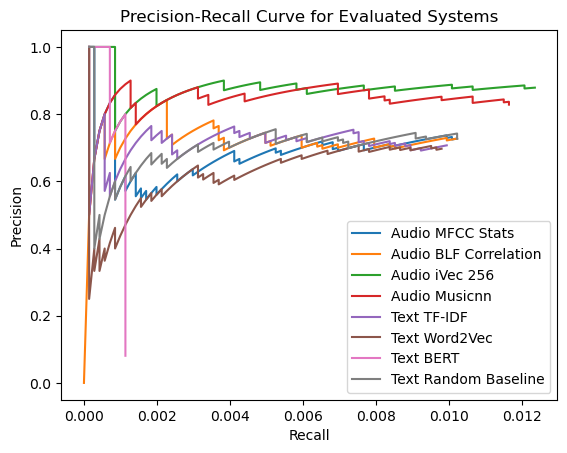

In [50]:
#retrieve 100 results for precision-recall plot (audio based) because k should be varied in the interval [1,100]
q2_100_mfcc_stats = get_genre_from_ids(audio_based(id=id_track2, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q2_100_blf_correlation = get_genre_from_ids(audio_based(id=id_track2, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q2_100_ivec256 = get_genre_from_ids(audio_based(id=id_track2, repr=ivec256, N=100, sim_func=cos_sim), genres)
q2_100_musicnn = get_genre_from_ids(audio_based(id=id_track2, repr=musicnn, N=100, sim_func=cos_sim), genres)
q2_100_tfidf = get_genre_from_ids(text_based(id=id_track2, repr=tfidf, N=100, sim_func=cos_sim), genres)
q2_100_word2vec = get_genre_from_ids(text_based(id=id_track2, repr=word2vec, N=100, sim_func=cos_sim),genres)
q2_100_bert =  get_genre_from_ids(text_based(id=id_track2, repr=bert, N=100, sim_func=cos_sim),genres)
q2_100_base_line = get_genre_from_ids(random_baseline(id=id_track2, info=info, N=100),genres)

#plot precision recall curve for query track2 for all evaluated systems

system_data2 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre2, "retrieved_genres": q2_100_mfcc_stats, "dataset_genres": genres_list},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre2, "retrieved_genres": q2_100_blf_correlation, "dataset_genres": genres_list},
    "audio ivec_256": {"system_name": "Audio iVec 256","query_genre": query_genre2, "retrieved_genres": q2_100_ivec256, "dataset_genres":genres_list},
    "audio muiscnn": {"system_name": "Audio Musicnn","query_genre": query_genre2, "retrieved_genres": q2_100_musicnn, "dataset_genres":genres_list},
    "text tf-idf": {"system_name": "Text TF-IDF","query_genre": query_genre2, "retrieved_genres": q2_100_tfidf, "dataset_genres":genres_list},
    "text word2vec": {"system_name": "Text Word2Vec","query_genre": query_genre2, "retrieved_genres": q2_100_word2vec, "dataset_genres":genres_list},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre2, "retrieved_genres": q2_genres_bert, "dataset_genres":genres_list},
    "text random": {"system_name": "Text Random Baseline","query_genre": query_genre2, "retrieved_genres": q2_100_base_line, "dataset_genres":genres_list},
}

plot_precision_recall_curve(system_data2)

In [51]:
# calculate genre diversity@10
all_genres = list(set([item for id in genres['id'] for item in get_genre(id, genres)]))

#audio based
q2_genre_mfcc_stats = [get_genre(id, genres) for id in res["track2"]["mfcc_stats"]["tracks"]]
q2_genre_blf_correlation = [get_genre(id, genres) for id in res["track2"]["blf_correlation"]["tracks"]]
q2_genre_ivec256 = [get_genre(id, genres) for id in res["track2"]["ivec256"]["tracks"]]
q2_genre_musicnn = [get_genre(id, genres) for id in res["track2"]["musicnn"]["tracks"]]
#text based
q2_genre_tfidf = [get_genre(id, genres) for id in res["track2"]["tfidf"]["tracks"]]
q2_genre_word2vec = [get_genre(id, genres) for id in res["track2"]["word2vec"]["tracks"]]
q2_genre_bert = [get_genre(id, genres) for id in res["track2"]["bert"]["tracks"]]
q2_genre_random = [get_genre(id, genres) for id in res["track2"]["base_line"]["tracks"]]

#calculate genre diversity @10
res["track2"]["mfcc_stats"]["genre_diversity@10"] = gen_div_10(q2_genre_mfcc_stats, all_genres, N=10)
genre_div = res["track2"]["mfcc_stats"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["blf_correlation"]["genre_diversity@10"] = gen_div_10(q2_genre_blf_correlation,all_genres,N=10)
genre_div = res["track2"]["blf_correlation"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["ivec256"]["genre_diversity@10"] = gen_div_10(q2_genre_ivec256,all_genres,N=10)
genre_div = res["track2"]["ivec256"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["musicnn"]["genre_diversity@10"] = gen_div_10(q2_genre_musicnn,all_genres,N=10)
genre_div = res["track2"]["musicnn"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["tfidf"]["genre_diversity@10"] = gen_div_10(q2_genre_tfidf,all_genres,N=10)
genre_div = res["track2"]["tfidf"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["word2vec"]["genre_diversity@10"] = gen_div_10(q2_genre_word2vec,all_genres,N=10)
genre_div = res["track2"]["word2vec"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["bert"]["genre_diversity@10"] = gen_div_10(q2_genre_bert,all_genres,N=10)
genre_div = res["track2"]["bert"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track2"]["base_line"]["genre_diversity@10"] = gen_div_10(q2_genre_random,all_genres,N=10)
genre_div = res["track2"]["base_line"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")


genre diversity@10: 4.463264650649218
genre diversity@10: 4.940636087858691
genre diversity@10: 5.02604074866775
genre diversity@10: 4.48012028053579
genre diversity@10: 4.980592617990701
genre diversity@10: 4.41128235144448
genre diversity@10: 4.7384778232010865
genre diversity@10: 4.885519720616351


In [55]:
# calculate genre coverage@10 
res["track2"]["mfcc_stats"]["genre_coverage@10"] = gen_cov_10(res["track2"]["mfcc_stats"]["tracks"], genres)
genre_cov = res["track2"]["mfcc_stats"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["blf_correlation"]["genre_coverage@10"] = gen_cov_10(res["track2"]["blf_correlation"]["tracks"], genres)
genre_cov = res["track2"]["blf_correlation"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["ivec256"]["genre_coverage@10"] = gen_cov_10(res["track2"]["ivec256"]["tracks"], genres)
genre_cov = res["track2"]["ivec256"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["musicnn"]["genre_coverage@10"] = gen_cov_10(res["track2"]["musicnn"]["tracks"], genres)
genre_cov = res["track2"]["musicnn"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["tfidf"]["genre_coverage@10"] = gen_cov_10(res["track2"]["tfidf"]["tracks"], genres)
genre_cov = res["track2"]["tfidf"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["word2vec"]["genre_coverage@10"] = gen_cov_10(res["track2"]["word2vec"]["tracks"], genres)
genre_cov = res["track2"]["word2vec"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["bert"]["genre_coverage@10"] = gen_cov_10(res["track2"]["bert"]["tracks"], genres)
genre_cov = res["track2"]["bert"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track2"]["base_line"]["genre_coverage@10"] = gen_cov_10(res["track2"]["base_line"]["tracks"], genres)
genre_cov = res["track2"]["base_line"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

genre coverage@10: 0.029676258992805755
genre coverage@10: 0.039568345323741004
genre coverage@10: 0.048561151079136694
genre coverage@10: 0.03237410071942446
genre coverage@10: 0.039568345323741004
genre coverage@10: 0.025179856115107913
genre coverage@10: 0.03866906474820144
genre coverage@10: 0.03327338129496403


In [54]:
# calculate ndcg@10 
res["track2"]["mfcc_stats"]["ndcg"] = ndcg_score(id_track2, res["track2"]["mfcc_stats"]["tracks"], genres)
ndcg = res["track2"]["mfcc_stats"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["blf_correlation"]["ndcg"] = ndcg_score(id_track2, res["track2"]["blf_correlation"]["tracks"], genres)
ndcg = res["track2"]["blf_correlation"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["ivec256"]["ndcg"] = ndcg_score(id_track2, res["track2"]["ivec256"]["tracks"], genres)
ndcg = res["track2"]["ivec256"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["musicnn"]["ndcg"] = ndcg_score(id_track2, res["track2"]["musicnn"]["tracks"], genres)
ndcg = res["track2"]["musicnn"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["tfidf"]["ndcg"] = ndcg_score(id_track2, res["track2"]["tfidf"]["tracks"], genres)
ndcg = res["track2"]["tfidf"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["word2vec"]["ndcg"] = ndcg_score(id_track2, res["track2"]["word2vec"]["tracks"], genres)
ndcg = res["track2"]["word2vec"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["bert"]["ndcg"] = ndcg_score(id_track2, res["track2"]["bert"]["tracks"], genres)
ndcg = res["track2"]["bert"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track2"]["base_line"]["ndcg"] = ndcg_score(id_track2, res["track2"]["base_line"]["tracks"], genres)
ndcg = res["track2"]["base_line"]["ndcg"]
print(f"ndcg: {ndcg}")


ndcg: 0.7542618308347483
ndcg: 0.7020800709310931
ndcg: 0.8326053447910284
ndcg: 0.7498281736486573
ndcg: 0.8575548603251164
ndcg: 0.8416277093229729
ndcg: 0.8864792868959819
ndcg: 0.6516097620891771


## Track 3
"Every Christmas" "Kelly Clarkson"

In [56]:
name = 'Every Christmas'
artist = 'Kelly Clarkson'
id_track3 = get_id_from_info(name, artist, info)

In [57]:
# retrieve tracks with random baseline 
res["track3"]["base_line"]["tracks"] = random_baseline(id=id_track3, info=info, N=10)

In [76]:
# retrieve tracks with text based retrieval systems 
res["track3"]["tfidf"]["tracks"] = text_based(id=id_track3, repr=tfidf, N=10, sim_func=cos_sim)
res["track3"]["word2vec"]["tracks"] = text_based(id=id_track3, repr=word2vec, N=10, sim_func=cos_sim)
res["track3"]["bert"]["tracks"] = text_based(id=id_track3, repr=bert, N=10, sim_func=cos_sim)

In [77]:
# retrieve tracks with audio based retrieval systems 
res["track3"]["blf_correlation"]["tracks"] = audio_based(id=id_track3, repr=blf_correlation, N=10, sim_func=cos_sim)
res["track3"]["ivec256"]["tracks"] = audio_based(id=id_track3, repr=ivec256, N=10, sim_func=cos_sim)
res["track3"]["mfcc_stats"]["tracks"] = audio_based(id=id_track3, repr=mfcc_stats, N=10, sim_func=cos_sim)
res["track3"]["musicnn"]["tracks"] = audio_based(id=id_track3, repr=musicnn, N=10, sim_func=cos_sim)

In [62]:
#retrieve genres of the results for precision@10 & recall@10 calculation
q3_genres_mfcc_stats = get_genre_from_ids(res["track3"]["mfcc_stats"]["tracks"],genres)
q3_genres_blf_correlation = get_genre_from_ids(res["track3"]["blf_correlation"]["tracks"], genres)
q3_genres_ivec256 = get_genre_from_ids(res["track3"]["ivec256"]["tracks"], genres)
q3_genres_musicnn = get_genre_from_ids(res["track3"]["musicnn"]["tracks"], genres)
q3_genres_tfidf = get_genre_from_ids(res["track3"]["tfidf"]["tracks"], genres)
q3_genres_word2vec = get_genre_from_ids(res["track3"]["word2vec"]["tracks"],genres)
q3_genres_bert =  get_genre_from_ids(res["track3"]["bert"]["tracks"],genres)
q3_genres_base_line = get_genre_from_ids(res["track3"]["base_line"]["tracks"],genres)

In [65]:
# calculate precision @10 for track3

#get query genre
query_genre3 = get_genre_from_query(id_track3, genres)

res["track3"]["mfcc_stats"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_mfcc_stats,10)
precision = res["track3"]["mfcc_stats"]["precision@10"]
print(f"precision@10: {precision}")

res["track3"]["blf_correlation"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_blf_correlation,10)
precision = res["track3"]["blf_correlation"]["precision@10"]
print(f"precision@10: {precision}")

res["track3"]["ivec256"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_ivec256,10)
precision = res["track3"]["ivec256"]["precision@10"] 
print(f"precision@10: {precision}")

res["track3"]["musicnn"]["precision@10"] = calculate_precision_at_k(query_genre3,q2_genres_musicnn,10)
precision = res["track3"]["musicnn"]["precision@10"]
print(f"precision@10: {precision}")

res["track3"]["tfidf"]["precision@10"]= calculate_precision_at_k(query_genre3,q3_genres_tfidf,10)
precision = res["track3"]["tfidf"]["precision@10"]
print(f"precision@10: {precision}")

res["track3"]["word2vec"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_word2vec,10)
precision = res["track3"]["word2vec"]["precision@10"]
print(f"precision@10: {precision}")

res["track3"]["bert"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_bert,10)
precision = res["track3"]["bert"]["precision@10"] 
print(f"precision@10: {precision}")

res["track3"]["base_line"]["precision@10"] = calculate_precision_at_k(query_genre3,q3_genres_base_line,10)
precision = res["track3"]["base_line"]["precision@10"]
print(f"precision@10: {precision}")

precision@10: 0.5
precision@10: 0.6
precision@10: 0.5
precision@10: 0.4
precision@10: 0.6
precision@10: 0.7
precision@10: 0.9
precision@10: 0.3


In [66]:
#query track 3 recall (k=10) for all 8 Retrieval Systems

res["track3"]["mfcc_stats"]["recall@10"] = calculate_recall_at_k(query_genre3, q3_genres_mfcc_stats,genres_list,10)
recall = res["track3"]["mfcc_stats"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["blf_correlation"]["recall@10"] = calculate_recall_at_k(query_genre3, q3_genres_blf_correlation,genres_list,10)
recall = res["track3"]["blf_correlation"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["ivec256"]["recall@10"] = calculate_recall_at_k(query_genre3, q3_genres_ivec256,genres_list,10)
recall = res["track3"]["ivec256"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["musicnn"]["recall@10"] = calculate_recall_at_k(query_genre3, q3_genres_musicnn,genres_list,10)
recall = res["track3"]["musicnn"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["tfidf"]["recall@10"] = calculate_recall_at_k(query_genre3, q3_genres_tfidf,genres_list,10)
recall = res["track3"]["tfidf"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["word2vec"]["recall@10"]= calculate_recall_at_k(query_genre3, q3_genres_word2vec,genres_list,10)
recall = res["track3"]["word2vec"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["bert"]["recall@10"]= calculate_recall_at_k(query_genre3,q3_genres_bert,genres_list,10)
recall = res["track3"]["bert"]["recall@10"]
print(f"recall@10: {recall}")

res["track3"]["base_line"]["recall@10"] = calculate_recall_at_k(query_genre3,q3_genres_base_line,genres_list,10)
recall = res["track3"]["base_line"]["recall@10"]
print(f"recall@10: {recall}")

recall@10: 0.0011899095668729176
recall@10: 0.0014278914802475012
recall@10: 0.0011899095668729176
recall@10: 0.0014278914802475012
recall@10: 0.0014278914802475012
recall@10: 0.0016658733936220848
recall@10: 0.002141837220371252
recall@10: 0.0007139457401237506


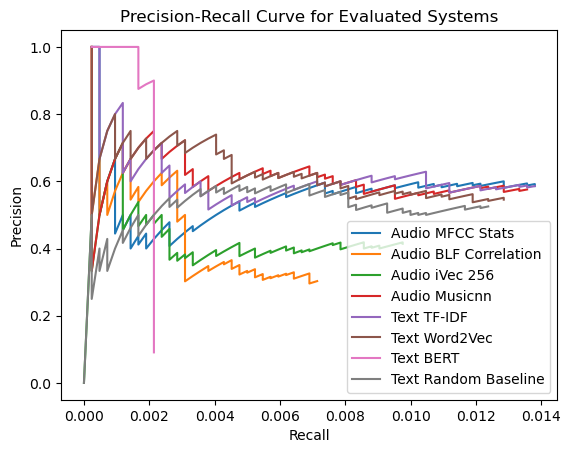

In [67]:
#retrieve 100 results for precision-recall plot (audio based) because k should be varied in the interval [1,100]
q3_100_mfcc_stats = get_genre_from_ids(audio_based(id=id_track3, repr=mfcc_stats, N=100, sim_func=cos_sim), genres)
q3_100_blf_correlation = get_genre_from_ids(audio_based(id=id_track3, repr=blf_correlation, N=100, sim_func=cos_sim), genres)
q3_100_ivec256 = get_genre_from_ids(audio_based(id=id_track3, repr=ivec256, N=100, sim_func=cos_sim), genres)
q3_100_musicnn = get_genre_from_ids(audio_based(id=id_track3, repr=musicnn, N=100, sim_func=cos_sim), genres)
q3_100_tfidf = get_genre_from_ids(text_based(id=id_track3, repr=tfidf, N=100, sim_func=cos_sim), genres)
q3_100_word2vec = get_genre_from_ids(text_based(id=id_track3, repr=word2vec, N=100, sim_func=cos_sim),genres)
q3_100_bert =  get_genre_from_ids(text_based(id=id_track3, repr=bert, N=100, sim_func=cos_sim),genres)
q3_100_base_line = get_genre_from_ids(random_baseline(id=id_track3, info=info, N=100),genres)

#plot precision recall curve for query track3 for all evaluated systems

system_data3 = {
    "audio mfcc stats": {"system_name": "Audio MFCC Stats","query_genre": query_genre3, "retrieved_genres": q3_100_mfcc_stats, "dataset_genres": genres_list},
    "audio blf correlation": {"system_name": "Audio BLF Correlation","query_genre": query_genre3, "retrieved_genres": q3_100_blf_correlation, "dataset_genres": genres_list},
    "audio ivec_256": {"system_name": "Audio iVec 256","query_genre": query_genre3, "retrieved_genres": q3_100_ivec256, "dataset_genres":genres_list},
    "audio muiscnn": {"system_name": "Audio Musicnn","query_genre": query_genre3, "retrieved_genres": q3_100_musicnn, "dataset_genres":genres_list},
    "text tf-idf": {"system_name": "Text TF-IDF","query_genre": query_genre3, "retrieved_genres": q3_100_tfidf, "dataset_genres":genres_list},
    "text word2vec": {"system_name": "Text Word2Vec","query_genre": query_genre3, "retrieved_genres": q3_100_word2vec, "dataset_genres":genres_list},
    "text bert": {"system_name": "Text BERT","query_genre": query_genre3, "retrieved_genres": q3_genres_bert, "dataset_genres":genres_list},
    "text random": {"system_name": "Text Random Baseline","query_genre": query_genre3, "retrieved_genres": q3_100_base_line, "dataset_genres":genres_list},
}

plot_precision_recall_curve(system_data3)

In [73]:
# calculate genre diversity@10
all_genres = list(set([item for id in genres['id'] for item in get_genre(id, genres)]))

#audio based
q3_genre_mfcc_stats = [get_genre(id, genres) for id in res["track3"]["mfcc_stats"]["tracks"]]
q3_genre_blf_correlation = [get_genre(id, genres) for id in res["track3"]["blf_correlation"]["tracks"]]
q3_genre_ivec256 = [get_genre(id, genres) for id in res["track3"]["ivec256"]["tracks"]]
q3_genre_musicnn = [get_genre(id, genres) for id in res["track3"]["musicnn"]["tracks"]]
#text based
q3_genre_tfidf = [get_genre(id, genres) for id in res["track3"]["tfidf"]["tracks"]]
q3_genre_word2vec = [get_genre(id, genres) for id in res["track3"]["word2vec"]["tracks"]]
q3_genre_bert = [get_genre(id, genres) for id in res["track3"]["bert"]["tracks"]]
q3_genre_random = [get_genre(id, genres) for id in res["track3"]["base_line"]["tracks"]]

#calculate genre diversity @10
res["track3"]["mfcc_stats"]["genre_diversity@10"] = gen_div_10(q3_genre_mfcc_stats, all_genres, N=10)
genre_div = res["track3"]["mfcc_stats"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["blf_correlation"]["genre_diversity@10"] = gen_div_10(q3_genre_blf_correlation,all_genres,N=10)
genre_div = res["track3"]["blf_correlation"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["ivec256"]["genre_diversity@10"] = gen_div_10(q3_genre_ivec256,all_genres,N=10)
genre_div = res["track3"]["ivec256"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["musicnn"]["genre_diversity@10"] = gen_div_10(q3_genre_musicnn,all_genres,N=10)
genre_div = res["track3"]["musicnn"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["tfidf"]["genre_diversity@10"] = gen_div_10(q3_genre_tfidf,all_genres,N=10)
genre_div = res["track3"]["tfidf"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["word2vec"]["genre_diversity@10"] = gen_div_10(q3_genre_word2vec,all_genres,N=10)
genre_div = res["track3"]["word2vec"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["bert"]["genre_diversity@10"] = gen_div_10(q3_genre_bert,all_genres,N=10)
genre_div = res["track3"]["bert"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")

res["track3"]["base_line"]["genre_diversity@10"] = gen_div_10(q3_genre_random,all_genres,N=10)
genre_div = res["track3"]["base_line"]["genre_diversity@10"]
print(f"genre diversity@10: {genre_div}")


genre diversity@10: 5.339126581608182
genre diversity@10: 4.843362738948359
genre diversity@10: 5.372485441638611
genre diversity@10: 5.144905790937944
genre diversity@10: 4.303693514254099
genre diversity@10: 5.331744355178888
genre diversity@10: 4.247762267266839
genre diversity@10: 4.529727632722689


In [74]:
# calculate genre coverage@10 
res["track3"]["mfcc_stats"]["genre_coverage@10"] = gen_cov_10(res["track3"]["mfcc_stats"]["tracks"], genres)
genre_cov = res["track3"]["mfcc_stats"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["blf_correlation"]["genre_coverage@10"] = gen_cov_10(res["track3"]["blf_correlation"]["tracks"], genres)
genre_cov = res["track3"]["blf_correlation"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["ivec256"]["genre_coverage@10"] = gen_cov_10(res["track3"]["ivec256"]["tracks"], genres)
genre_cov = res["track3"]["ivec256"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["musicnn"]["genre_coverage@10"] = gen_cov_10(res["track3"]["musicnn"]["tracks"], genres)
genre_cov = res["track3"]["musicnn"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["tfidf"]["genre_coverage@10"] = gen_cov_10(res["track3"]["tfidf"]["tracks"], genres)
genre_cov = res["track3"]["tfidf"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["word2vec"]["genre_coverage@10"] = gen_cov_10(res["track3"]["word2vec"]["tracks"], genres)
genre_cov = res["track3"]["word2vec"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["bert"]["genre_coverage@10"] = gen_cov_10(res["track3"]["bert"]["tracks"], genres)
genre_cov = res["track3"]["bert"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

res["track3"]["base_line"]["genre_coverage@10"] = gen_cov_10(res["track3"]["base_line"]["tracks"], genres)
genre_cov = res["track3"]["base_line"]["genre_coverage@10"]
print(f"genre coverage@10: {genre_cov}")

genre coverage@10: 0.05845323741007194
genre coverage@10: 0.04946043165467626
genre coverage@10: 0.05485611510791367
genre coverage@10: 0.048561151079136694
genre coverage@10: 0.03507194244604316
genre coverage@10: 0.046762589928057555
genre coverage@10: 0.03776978417266187
genre coverage@10: 0.0341726618705036


In [78]:
# calculate ndcg@10 
res["track3"]["mfcc_stats"]["ndcg"] = ndcg_score(id_track3, res["track3"]["mfcc_stats"]["tracks"], genres)
ndcg = res["track3"]["mfcc_stats"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["blf_correlation"]["ndcg"] = ndcg_score(id_track3, res["track3"]["blf_correlation"]["tracks"], genres)
ndcg = res["track3"]["blf_correlation"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["ivec256"]["ndcg"] = ndcg_score(id_track3, res["track3"]["ivec256"]["tracks"], genres)
ndcg = res["track3"]["ivec256"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["musicnn"]["ndcg"] = ndcg_score(id_track3, res["track3"]["musicnn"]["tracks"], genres)
ndcg = res["track3"]["musicnn"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["tfidf"]["ndcg"] = ndcg_score(id_track3, res["track3"]["tfidf"]["tracks"], genres)
ndcg = res["track3"]["tfidf"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["word2vec"]["ndcg"] = ndcg_score(id_track3, res["track3"]["word2vec"]["tracks"], genres)
ndcg = res["track3"]["word2vec"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["bert"]["ndcg"] = ndcg_score(id_track3, res["track3"]["bert"]["tracks"], genres)
ndcg = res["track3"]["bert"]["ndcg"]
print(f"ndcg: {ndcg}")

res["track3"]["base_line"]["ndcg"] = ndcg_score(id_track3, res["track3"]["base_line"]["tracks"], genres)
ndcg = res["track3"]["base_line"]["ndcg"]
print(f"ndcg: {ndcg}")

ndcg: 0.570581209044283
ndcg: 0.6133971708972615
ndcg: 0.5863021893007933
ndcg: 0.5909901524813768
ndcg: 0.9526689104687949
ndcg: 0.737118860410854
ndcg: 0.7651136184775313
ndcg: 0.49638942435380906
